In [1]:
import fluids
from fluids.units import *

Given:  A 6"x4" Class 600 steel gate valve with inlet and outlet ports conically tapered from back of body rights to valve ends.  Face-to-face dimension is 22" and back of seat ring to back of seat ring is about 6".
Find.  K2 for any flow condition, and L/D and L for flow in zone of complete turbulence.

K2, L/D and L should be given in terms of 6" Schedule 80 pipe.
K2 is the downstream fitings resistance coefficient

# Solve using the fluids-built in functions exclusively

Only the following types of clean, new pipe have data available:
‘Plastic coated’
‘Carbon steel, honed bare’
‘Cr13, electropolished bare’
‘Cement lining’
‘Carbon steel, bare’
‘Fiberglass lining’
‘Cr13, bare’

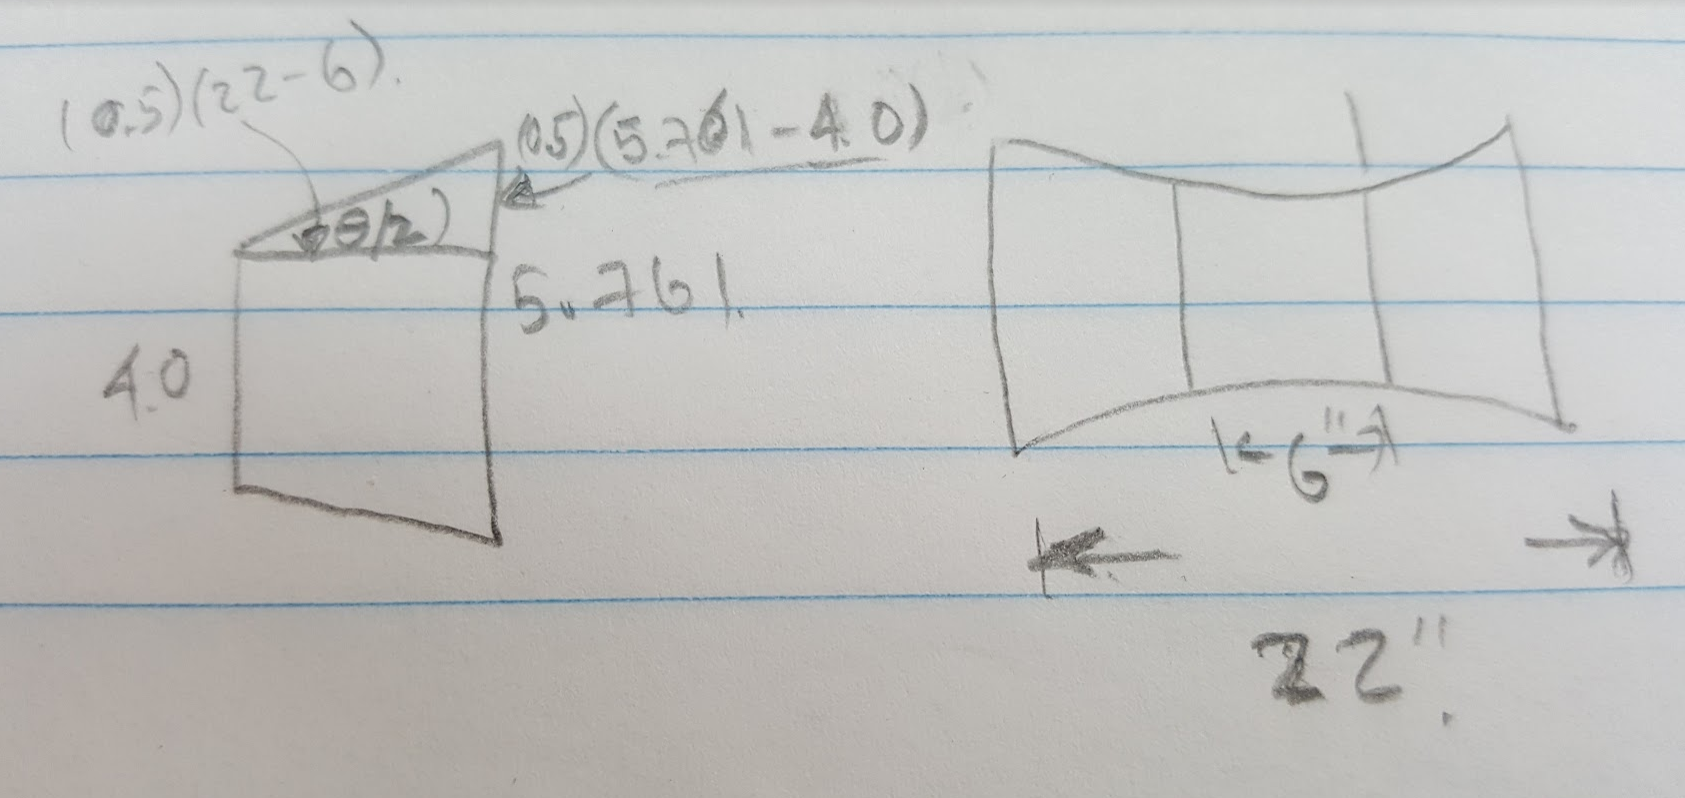

In [2]:
d1 = (4.0*u.inch).to(u.meter)  #valve seat bore is 4.0"
d2 = nearest_pipe(NPS=6*u.inch, schedule='80')[1]

beta = d1/d2

ft = 0.015 #Crane 410, A-27
K1 = 8*ft #from Crane 410 A-28

tan_theta_div2 = 0.5*(d2.to(u.inch)-d1.to(u.inch))/(0.5*(22*u.inch-6*u.inch))
sin_theta_div2 = tan_theta_div2 #approximately accurate for small theta


K2 = (K1+sin_theta_div2*(0.8*(1-beta**2)+2.6*(1-beta**2)**2))/beta**4 #from Crane 410 A-27

LD = K2/ft

L = (LD*d2.to(u.inch)).to(u.feet)

print("K2 is: {}, L/D is: {}, L is {}".format(K2, LD, L))

K2 is: 1.0443998252277853 dimensionless, L/D is: 69.62665501518569 dimensionless, L is 33.433586706110816 foot


# Solution as Provided by Crane 410

In [3]:
d1 = 4.0*u.inch #Valve seat bore
d2 = nearest_pipe(NPS=6*u.inch, schedule='80')[1].to(u.inch)

beta = d1/d2

f = 0.015 #Crane A-26 for 6" pipe

K1 = 8*f #fully turbulent flow

#tan_theta_div2 = 0.5*(d2.to(u.inch)-d1.to(u.inch))/(0.5*(22*u.inch-6*u.inch))
tan_theta_div2 = 0.5*(5.761-4.0)/(0.5*(22-6))
sin_theta_div2 = tan_theta_div2 #approximately accurate for small theta


K2 = (K1+sin_theta_div2*(0.8*(1-beta**2)+2.6*(1-beta**2)**2))/beta**4

LD = K2/f

#L = (LD*d2.to(u.inch)).to(u.feet)

L = (LD*d2.to(u.inch)).to(u.feet)

print("K2 is: {}, L/D is: {}, L is {}".format(K2, LD, L))

K2 is: 1.0440391121107628 dimensionless, L/D is: 69.60260747405086 dimensionless, L is 33.42203946818269 foot


The calculation from the fluids module vs what Crane 410 gives is pretty close.